<a href="https://colab.research.google.com/github/Shubhm-Chaudhary/Analysis-of-SuperStore-Dataset/blob/main/SuperStore_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# loading the dataset
df = pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [23]:
df.shape

(9994, 13)

In [32]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [31]:
df.drop(columns="Postal Code", inplace=True)

In [9]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [29]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [33]:
# Statistical description of data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [34]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [35]:
df.duplicated().sum()

50

In [54]:
product_group = df.groupby(['Sub-Category']).sum()['Sales']
product_group.head()

<ipython-input-54-b8a7698f7914>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group = df.groupby(['Sub-Category']).sum()['Sales']


Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Name: Sales, dtype: float64

In [58]:
top_selling_category = product_group.sort_values(ascending = False)
top_selling_categories = pd.DataFrame(top_selling_category[:5])
top_selling_categories

,Sales
Sub-Category,
Phones,330007.054
Chairs,328449.103
Storage,223843.608
Tables,206965.532
Binders,203412.733


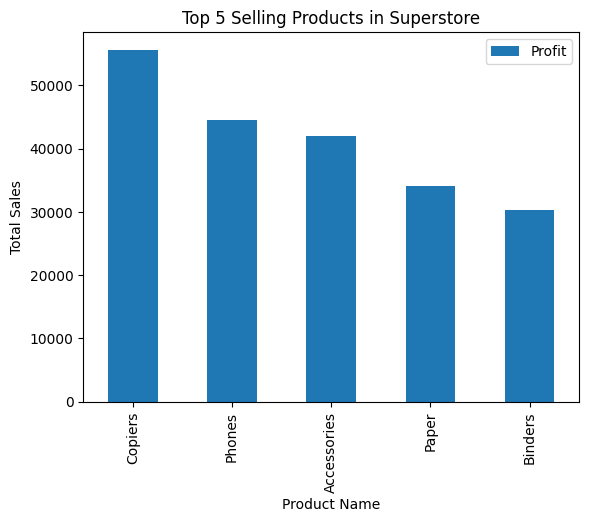

In [68]:
top_selling_categories.plot.bar()
# Add a title to the plot
plt.title("Top 5 Selling Products in Superstore")

# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Sales")

# Show the plot
plt.show()

In [65]:
product_group = df.groupby(['Sub-Category']).sum()['Profit']
product_group.head()


<ipython-input-65-882651d72078>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group = df.groupby(['Sub-Category']).sum()['Profit']


Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Name: Profit, dtype: float64

In [66]:
top_profit_category = product_group.sort_values(ascending = False)
top_profit_categories = pd.DataFrame(top_profit_category[:5])
top_profit_categories

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633


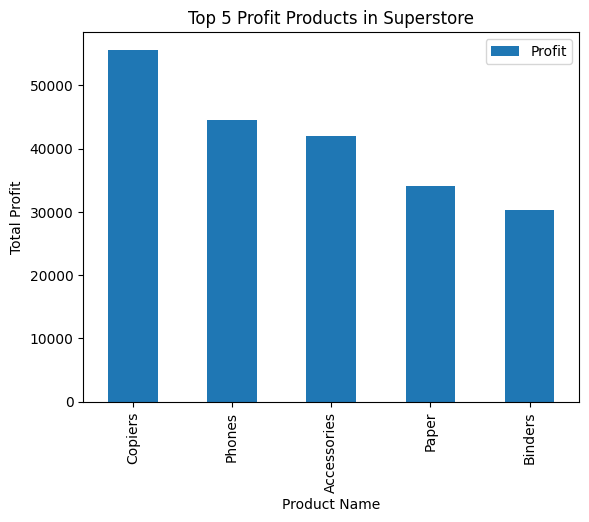

In [67]:
top_profit_categories.plot.bar()
# Add a title to the plot
plt.title("Top 5 Profit Products in Superstore")

# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Profit")

# Show the plot
plt.show()

In [50]:
df_places = df[['City','State','Region','Sales','Profit']]
df_places.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


<ipython-input-51-7b2d0992f753>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_sales = df_places.groupby(['State'], as_index=False).sum()


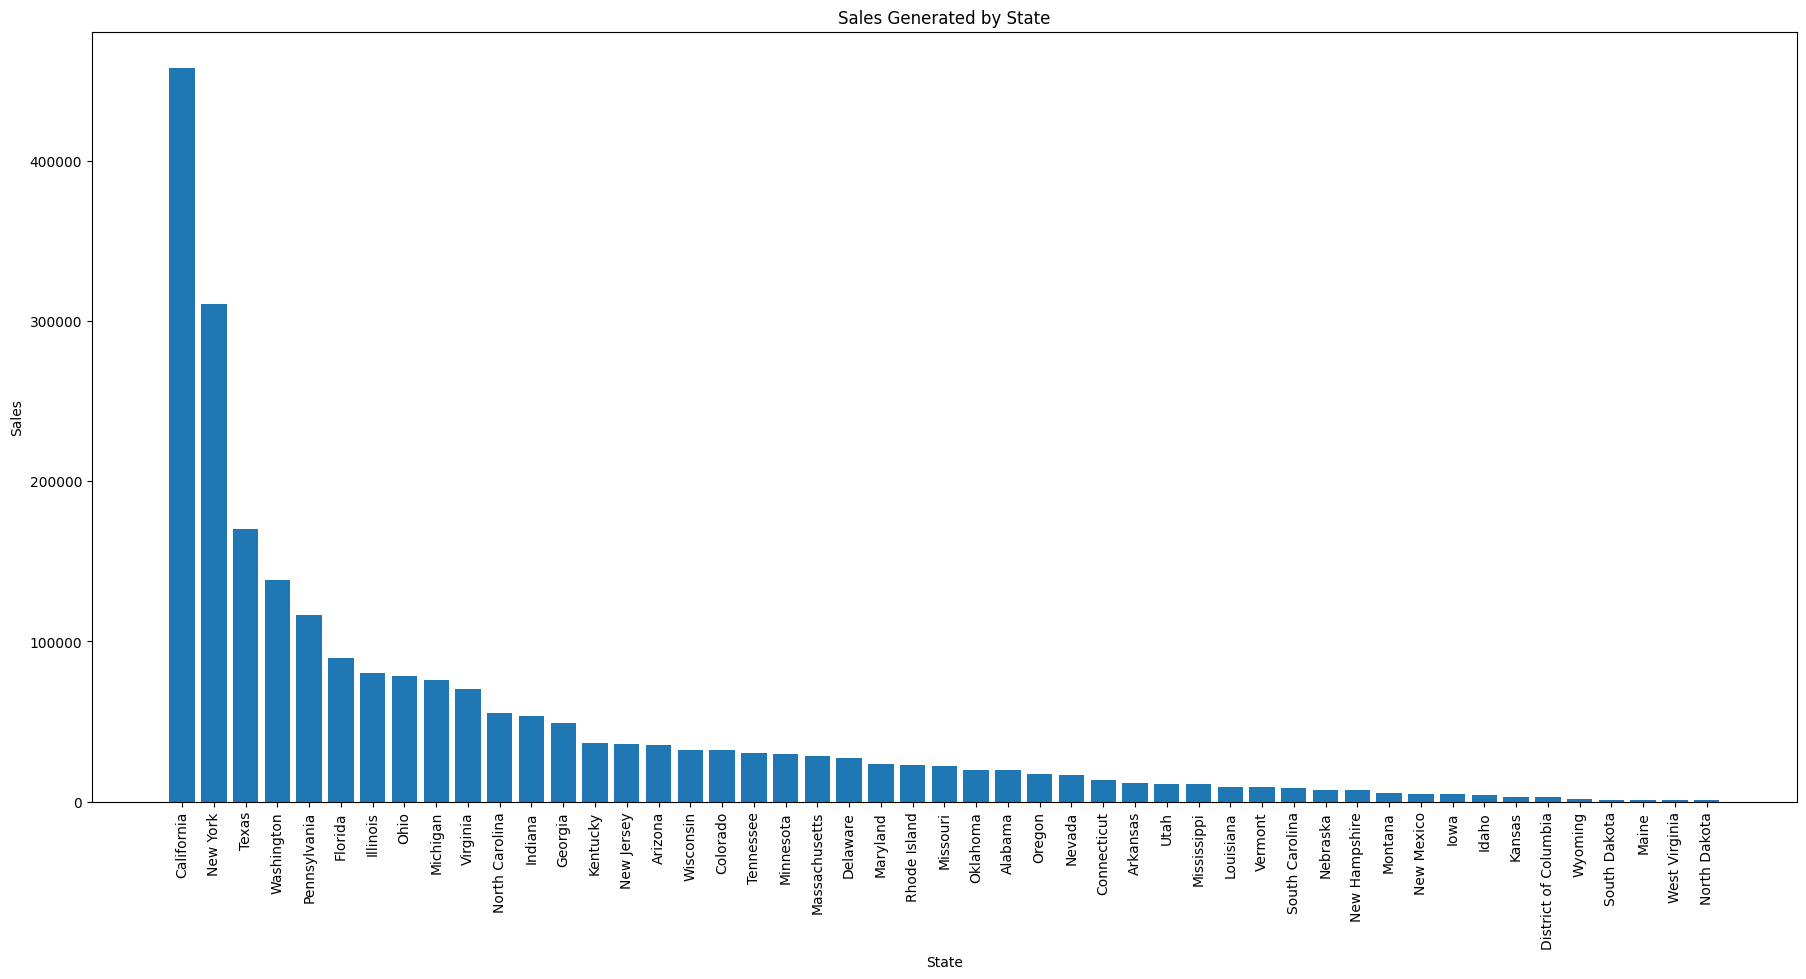

,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
41,Texas,170188.0458,-25729.3563
45,Washington,138641.2700,33402.6517
36,Pennsylvania,116511.9140,-15559.9603
8,Florida,89473.7080,-3399.3017
11,Illinois,80166.1010,-12607.8870
33,Ohio,78258.1360,-16971.3766
20,Michigan,76269.6140,24463.1876
44,Virginia,70636.7200,18597.9504


In [51]:
state_sales = df_places.groupby(['State'], as_index=False).sum()
state_sales.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(state_sales['State'], state_sales['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()
state_sales

<Axes: xlabel='Region'>

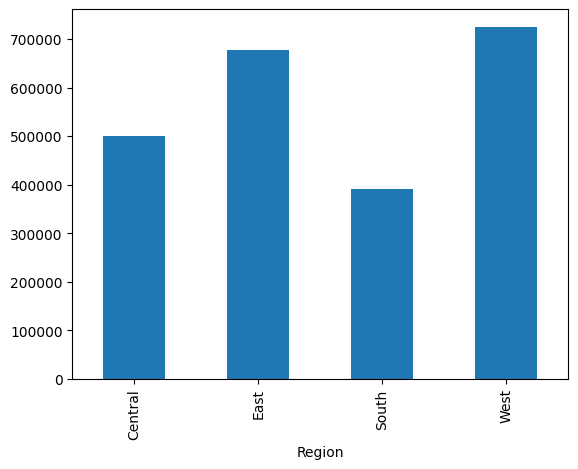

In [14]:
# sales analysis on the basis of region
df.groupby("Region")["Sales"].sum().plot.bar()

In [52]:
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


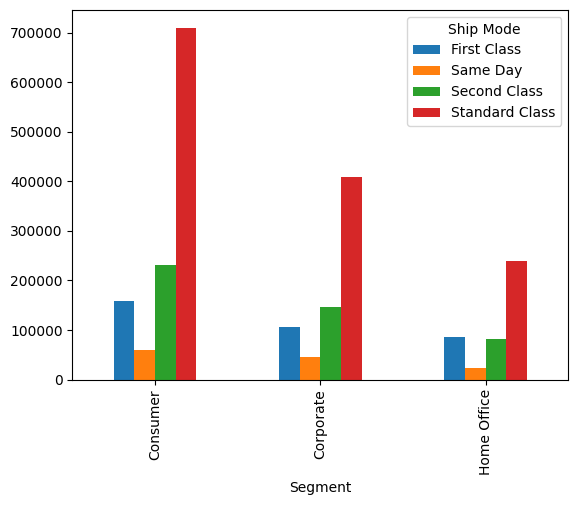

In [53]:
# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False)
plt.show()

<Axes: xlabel='Region'>

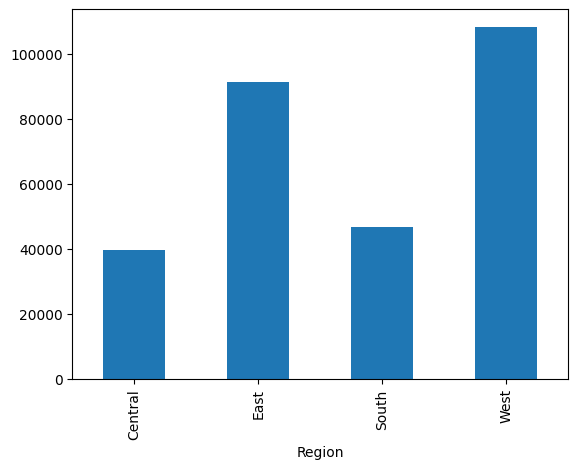

In [15]:
# profit analysis on the basis of region
df.groupby("Region")["Profit"].sum().plot.bar()

In [16]:
# Regions wth most sales
df_places = df[['Country','City','State','Region']]
df_places.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


<Axes: ylabel='Sales'>

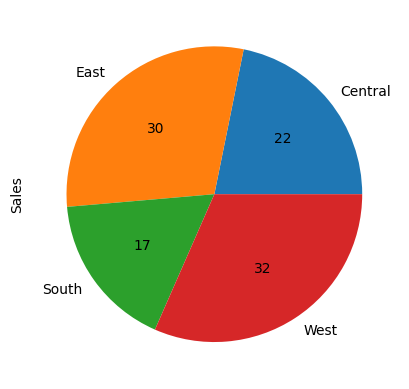

In [ ]:
# pie chart sales analysis based on region
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f")

<Axes: ylabel='Profit'>

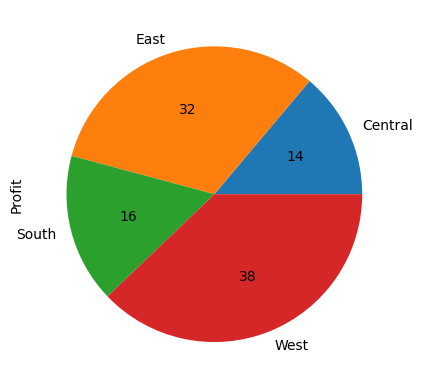

In [69]:
# pie chart profit anallysis based on different regions
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f")

<Axes: xlabel='Segment'>

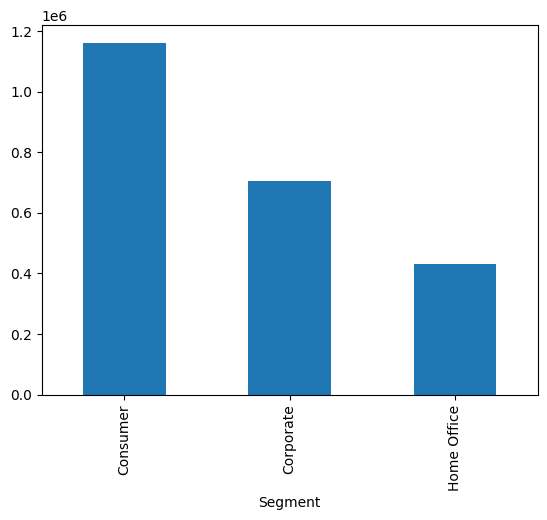

In [70]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<Axes: xlabel='Segment'>

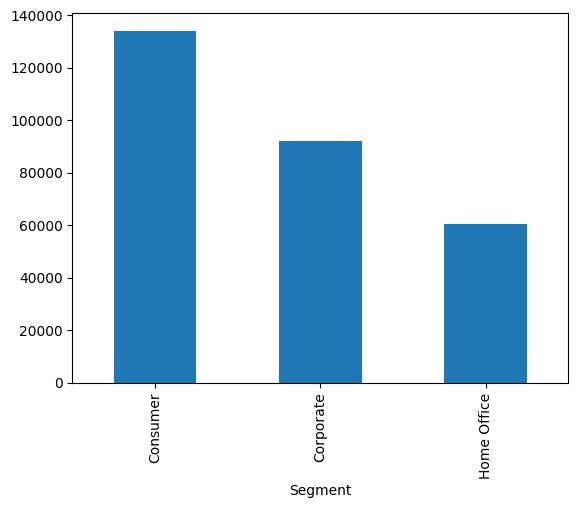

In [71]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<Axes: xlabel='Category'>

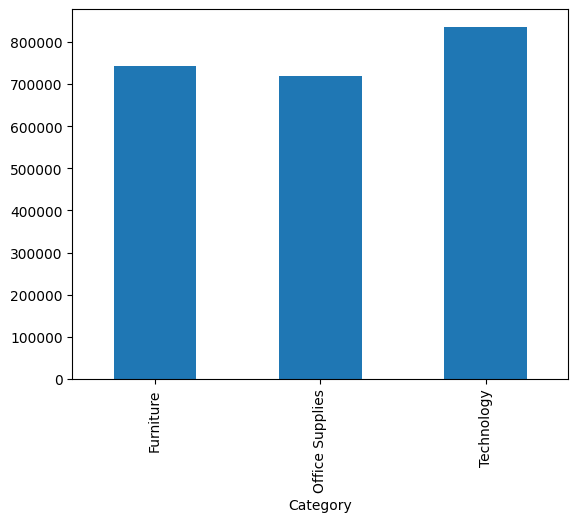

In [73]:
df.groupby("Category")["Sales"].sum().plot.bar()

<Axes: xlabel='Category'>

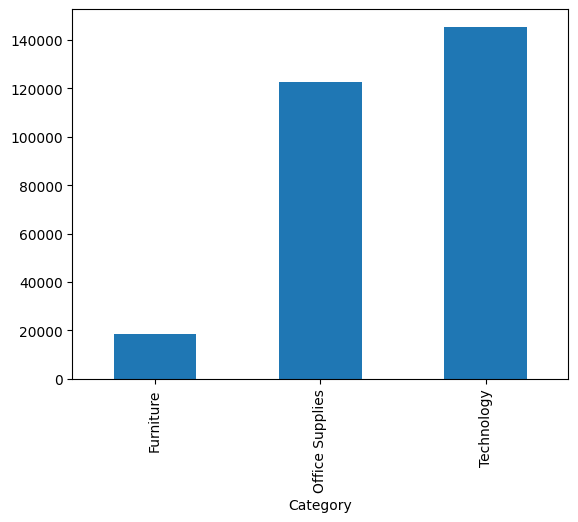

In [72]:
df.groupby("Category")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

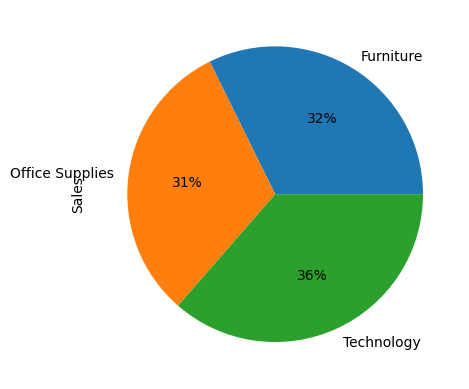

In [74]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

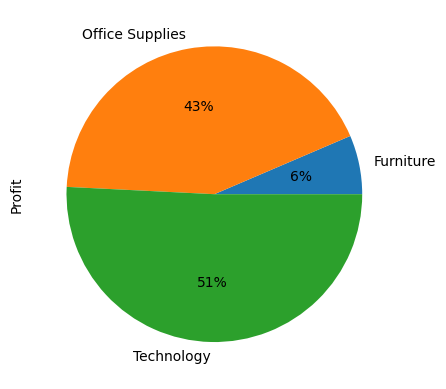

In [75]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='State'>

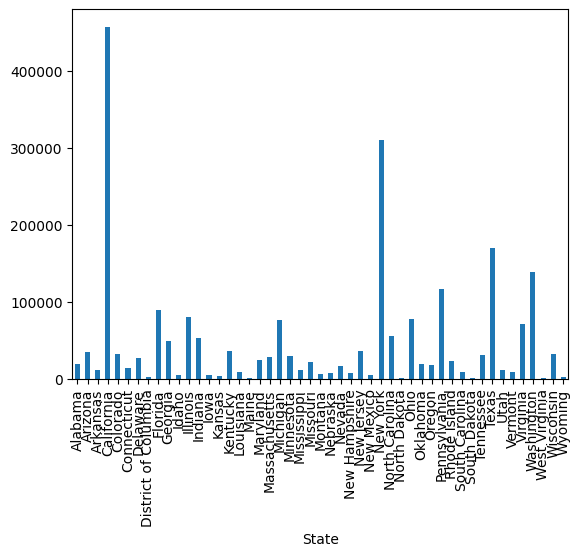

In [76]:
df.groupby("State")["Sales"].sum().plot.bar()

<Axes: xlabel='State'>

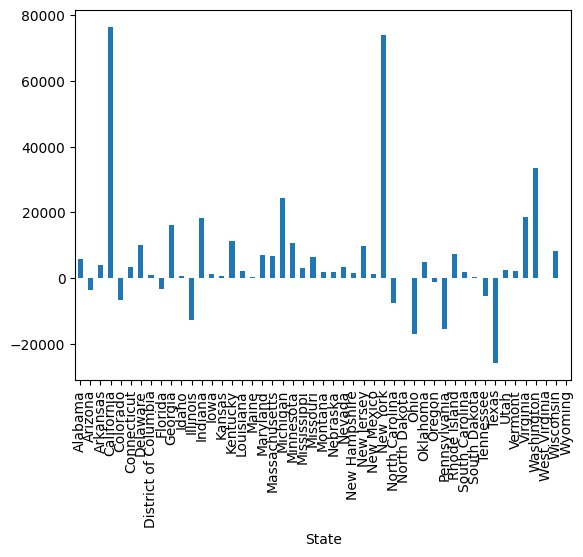

In [77]:
df.groupby("State")["Profit"].sum().plot.bar()

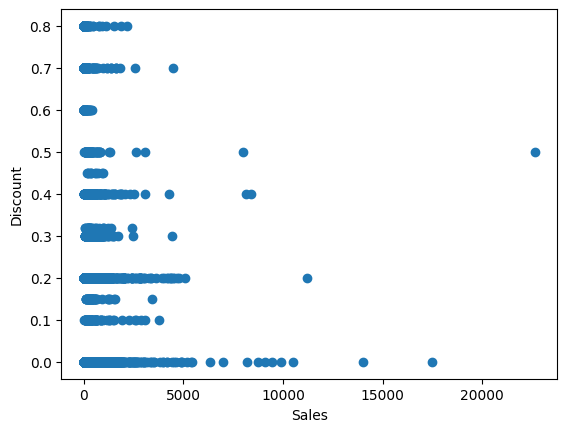

In [80]:
# Create a scatter plot between sales and discounts
plt.scatter(df['Sales'],df['Discount'])

plt.ylabel("Discount")
plt.xlabel("Sales")
plt.show()

<ipython-input-81-b7a88ffab020>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  discount_group = df.groupby(["Discount"]).sum()[["Profit"]]


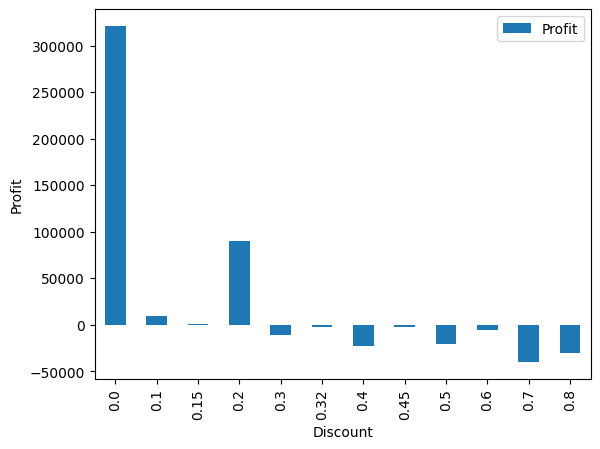

In [81]:
# Group the data by the discount and compute the average sales
discount_group = df.groupby(["Discount"]).sum()[["Profit"]]

ax = discount_group.plot(kind="bar")

ax.set_ylabel("Profit")

plt.show()